<a href="https://colab.research.google.com/github/hnioua/Gene-Expression-Analysis-in-Colorectal-Cancer-Using-Machine-Learning/blob/main/Logistic_Regression_Sprint_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Préparation du dataset

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Imports the dataset
df = pd.read_csv('colon_cancer.csv', sep=';')
df

,id_sample,ADH1C,DHRS11,UGP2,SLC7A5,CTSS,DAO,NIBAN1,PRUNE2,FOXF2,...,BSPRY,CDHR2,ERRFI1,CLIC5,PLLP,GAL,CRYL1,YBX2,ANGPTL4,tissue_status
0,EPSM-COLON-0001,9.199944,6.090054,7.062512,3.864253,7.869368,8.465133,1.174665,0.975086,3.028995,...,5.528372,3.500730,2.893760,5.130743,1.485110,1.830484,6.379933,3.919293,3.031413,normal
1,EPSM-COLON-0002,7.767618,6.027985,6.318818,3.069581,6.410334,8.159814,5.959414,1.625518,2.984629,...,5.671788,4.658790,4.715374,5.438104,2.131466,2.097157,6.863173,0.322829,3.978531,normal
2,EPSM-COLON-0003,7.918904,5.885948,6.917742,3.188257,7.915549,8.004194,1.560386,2.379909,2.929762,...,4.596079,5.649376,4.047899,6.580938,1.447209,3.890943,6.209704,3.274407,3.714491,normal
3,EPSM-COLON-0004,9.053553,6.027985,7.081085,2.357523,5.657726,8.004194,3.548988,3.260031,3.313829,...,4.135061,5.437107,4.537381,4.615263,1.004454,1.840902,6.774063,3.320525,3.080796,normal
4,EPSM-COLON-0005,6.027822,5.791257,5.937685,4.137667,5.818999,8.056067,3.307945,5.208874,4.191695,...,3.674043,6.286182,4.715374,4.432410,0.159195,3.506561,6.150297,0.461184,5.140305,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,EPSM-COLON-0800,6.019963,3.089364,4.393486,5.947781,7.124598,6.476207,3.511464,3.360520,2.954864,...,4.643061,4.632634,4.670141,4.571678,2.864645,2.336317,6.923562,2.710594,2.507989,tumoral
800,EPSM-COLON-0801,3.691606,2.118164,4.794787,4.746829,5.493405,5.127365,3.516129,1.701237,2.771962,...,4.695878,1.800088,7.647284,1.340236,3.063140,3.410137,3.856952,1.491817,6.493643,tumoral
801,EPSM-COLON-0802,3.035242,2.495383,4.438451,5.916828,7.155135,5.556266,1.192243,1.169104,1.038835,...,4.886197,3.624820,3.912746,2.806374,3.170815,0.775487,4.952383,1.960087,2.809510,tumoral
802,EPSM-COLON-0803,3.021057,3.581192,4.822947,5.694947,6.789079,6.570513,1.404105,3.390414,2.653714,...,4.980576,4.088197,3.945064,3.426452,1.526074,4.175287,8.242634,2.225967,1.842766,tumoral


In [8]:
len(df)

804

In [9]:
print(df.columns)

Index(['id_sample', 'ADH1C', 'DHRS11', 'UGP2', 'SLC7A5', 'CTSS', 'DAO',
       'NIBAN1', 'PRUNE2', 'FOXF2', 'TENT5C', 'KLF10', 'FABP1', 'RPSAP19',
       'NCAPH', 'TPM1', 'PLA2G12B', 'PLAAT4', 'IGLV8-61', 'GSS', 'L1TD1',
       'RNF186', 'HES2', 'MXRA8', 'SOX18', 'NDFIP2', 'SIAE', 'NEURL1B',
       'DDIT4', 'TRPM4', 'RETREG1', 'OTULINL', 'CPVL', 'SAMD9', 'ANKRD40CL',
       'EPN3', 'CRYBG2', 'GIPC2', 'P3H2', 'STEAP3', 'THNSL2', 'TRAPPC14',
       'RHBDL2', 'RPP25', 'SEMA4C', 'RNF43', 'EPS8L1', 'TOR4A', 'PAQR5',
       'SIDT1', 'ESRP1', 'SYTL2', 'BSPRY', 'CDHR2', 'ERRFI1', 'CLIC5', 'PLLP',
       'GAL', 'CRYL1', 'YBX2', 'ANGPTL4', 'tissue_status'],
      dtype='object')


Le dataset "Gene Expression of Colon Cancer" disponible sur Kaggle contient des données sur l'expression de plusieurs gènes dans des échantillons de tissus, avec un total de 804 observations.

1. Description des Colonnes :





* id_sample : Identifiant unique de chaque échantillon.

* ADH1C, DHRS11, UGP2, ... : Ces colonnes représentent l'expression de différents gènes.

* tissue_status : Indique si l'échantillon provient d'un tissu cancéreux ou sain.

2. Objectif du Dataset :

Ce dataset permet d'analyser l'expression des gènes et d'identifier des biomarqueurs potentiels pour le diagnostic ou le traitement du cancer du côlon. Il peut être utilisé pour des études de classification afin de différencier les tissus cancéreux des tissus sains en fonction de l'expression génétique.

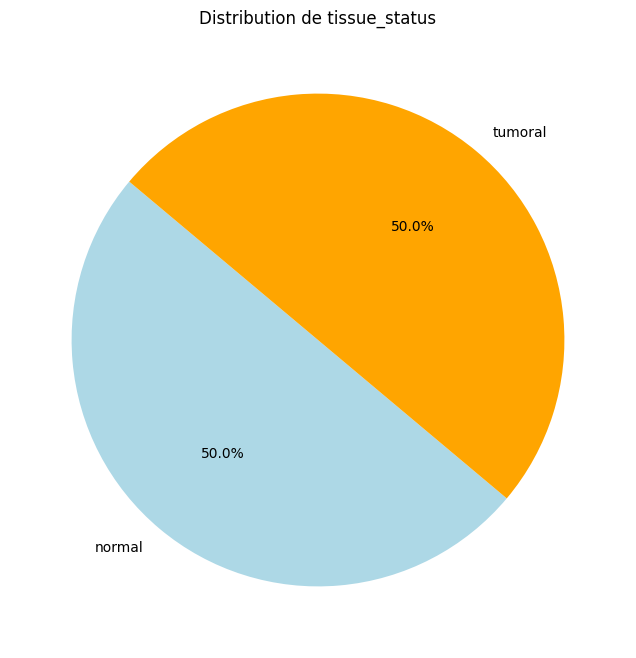

In [10]:
# Compter les occurrences des différentes catégories de la colonne 'tissue_status'
value_counts = df['tissue_status'].value_counts()

# Tracer le pie chart
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'orange'])
plt.title(f'Distribution de tissue_status')  # Correction ici : suppression des {}
plt.show()

* L'analyse de cette distribution montre que les classes "normal" et
"tumoral" sont équilibrées, chacune représentant 50 % des données.
* Cela signifie qu'il n'y a pas de déséquilibre dans le dataset en ce qui concerne la variable tissue_status.
* Cet équilibre peut être avantageux pour l'entraînement de modèles de classification, car il évite les biais liés à une sous-représentation d'une classe par rapport à l'autre.

In [11]:
# Defining X and y
X = df.drop(['tissue_status' , 'id_sample'],axis=1)
y = df.tissue_status

In [12]:
X

,ADH1C,DHRS11,UGP2,SLC7A5,CTSS,DAO,NIBAN1,PRUNE2,FOXF2,TENT5C,...,SYTL2,BSPRY,CDHR2,ERRFI1,CLIC5,PLLP,GAL,CRYL1,YBX2,ANGPTL4
0,9.199944,6.090054,7.062512,3.864253,7.869368,8.465133,1.174665,0.975086,3.028995,6.350919,...,3.951686,5.528372,3.500730,2.893760,5.130743,1.485110,1.830484,6.379933,3.919293,3.031413
1,7.767618,6.027985,6.318818,3.069581,6.410334,8.159814,5.959414,1.625518,2.984629,4.686086,...,4.269728,5.671788,4.658790,4.715374,5.438104,2.131466,2.097157,6.863173,0.322829,3.978531
2,7.918904,5.885948,6.917742,3.188257,7.915549,8.004194,1.560386,2.379909,2.929762,4.281126,...,4.050933,4.596079,5.649376,4.047899,6.580938,1.447209,3.890943,6.209704,3.274407,3.714491
3,9.053553,6.027985,7.081085,2.357523,5.657726,8.004194,3.548988,3.260031,3.313829,4.821072,...,4.357246,4.135061,5.437107,4.537381,4.615263,1.004454,1.840902,6.774063,3.320525,3.080796
4,6.027822,5.791257,5.937685,4.137667,5.818999,8.056067,3.307945,5.208874,4.191695,5.181036,...,1.906739,3.674043,6.286182,4.715374,4.432410,0.159195,3.506561,6.150297,0.461184,5.140305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,6.019963,3.089364,4.393486,5.947781,7.124598,6.476207,3.511464,3.360520,2.954864,1.708999,...,3.845019,4.643061,4.632634,4.670141,4.571678,2.864645,2.336317,6.923562,2.710594,2.507989
800,3.691606,2.118164,4.794787,4.746829,5.493405,5.127365,3.516129,1.701237,2.771962,2.215480,...,3.309359,4.695878,1.800088,7.647284,1.340236,3.063140,3.410137,3.856952,1.491817,6.493643
801,3.035242,2.495383,4.438451,5.916828,7.155135,5.556266,1.192243,1.169104,1.038835,2.833854,...,2.081777,4.886197,3.624820,3.912746,2.806374,3.170815,0.775487,4.952383,1.960087,2.809510
802,3.021057,3.581192,4.822947,5.694947,6.789079,6.570513,1.404105,3.390414,2.653714,3.190606,...,2.137942,4.980576,4.088197,3.945064,3.426452,1.526074,4.175287,8.242634,2.225967,1.842766


In [13]:
# Vérifier si des valeurs manquantes existent dans la matrice
missing_values_X = X.isna().sum().sum()
print("Nombre de valeurs manquantes :", missing_values_X)

Nombre de valeurs manquantes : 0


In [14]:
y

,tissue_status
0,normal
1,normal
2,normal
3,normal
4,normal
...,...
799,tumoral
800,tumoral
801,tumoral
802,tumoral


In [15]:
# Vérifier si des valeurs manquantes existent dans la matrice
missing_values_y = y.isna().sum().sum()
print("Nombre de valeurs manquantes :", missing_values_y)

Nombre de valeurs manquantes : 0


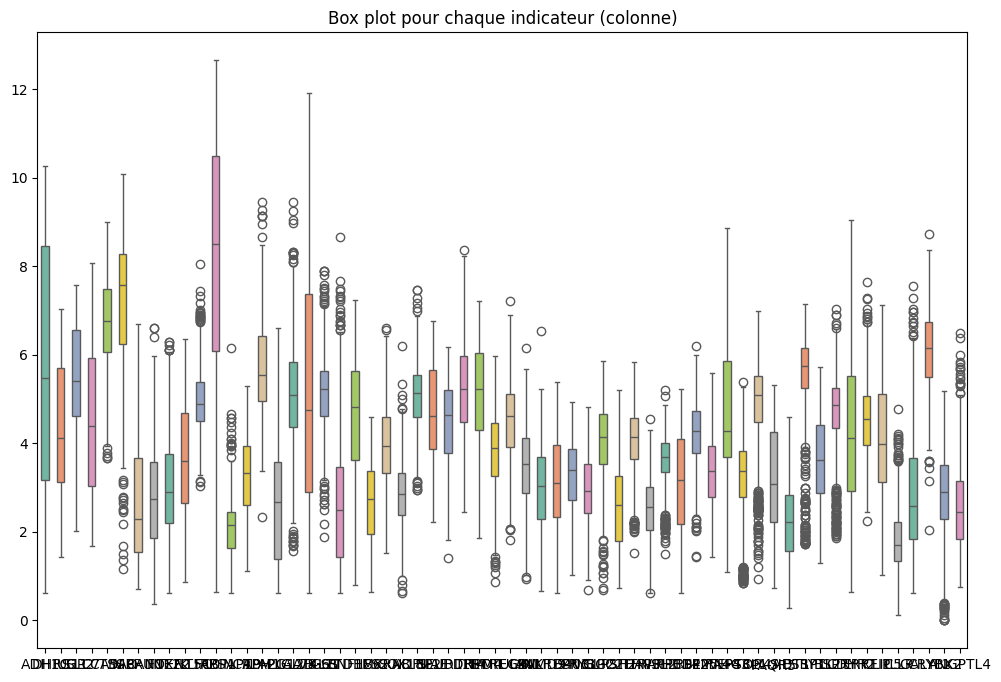

In [16]:
# Créer un box plot pour chaque colonne
plt.figure(figsize=(12, 8))
sns.boxplot(data=X, width=0.5, palette="Set2")

# Ajouter un titre
plt.title("Box plot pour chaque indicateur (colonne)")

# Afficher le graphique
plt.show()

In [17]:
outliers_count = sum(((X < (X.quantile(0.25) - 1.5 * (X.quantile(0.75) - X.quantile(0.25)))) |
                      (X > (X.quantile(0.75) + 1.5 * (X.quantile(0.75) - X.quantile(0.25))))).sum())

print(f"Nombre total de valeurs aberrantes : {outliers_count}")

Nombre total de valeurs aberrantes : 624


In [18]:
statistiques = X.describe()  # Cette méthode donne un résumé statistique
statistiques

,ADH1C,DHRS11,UGP2,SLC7A5,CTSS,DAO,NIBAN1,PRUNE2,FOXF2,TENT5C,...,SYTL2,BSPRY,CDHR2,ERRFI1,CLIC5,PLLP,GAL,CRYL1,YBX2,ANGPTL4
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,...,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,5.588943,4.354817,5.557694,4.513570,6.717535,7.218184,2.737937,2.806573,3.064394,3.658318,...,3.599294,4.682718,4.225014,4.575397,4.097244,1.823268,2.822931,6.096634,2.801603,2.596452
std,2.889901,1.431179,1.150565,1.614450,1.077821,1.411969,1.466906,1.243826,1.191486,1.258059,...,1.054504,0.917027,1.656088,0.859138,1.276589,0.721587,1.338349,0.840122,1.011971,1.000962
min,0.610504,1.427079,2.027201,1.685024,3.668691,1.164886,0.716737,0.368200,0.610504,0.858074,...,1.286220,1.868389,0.637047,2.250347,1.015235,0.118945,0.610504,2.031471,0.000000,0.757246
25%,3.174250,3.118844,4.611060,3.030022,6.065937,6.241714,1.550382,1.864561,2.198244,2.655091,...,2.878356,4.349295,2.921069,3.958903,3.131267,1.337715,1.840902,5.489589,2.277491,1.824823
50%,5.467024,4.125990,5.412204,4.382953,6.762908,7.578782,2.297732,2.741509,2.900393,3.605686,...,3.613342,4.869313,4.116251,4.537381,3.975276,1.689671,2.591044,6.150297,2.905605,2.442378
75%,8.444756,5.696566,6.556969,5.918848,7.485487,8.263561,3.669509,3.574304,3.752899,4.686086,...,4.417632,5.249372,5.507864,5.070072,5.118110,2.211967,3.661012,6.728052,3.505721,3.139738
max,10.263846,7.022241,7.571114,8.059430,8.990703,10.079135,6.682541,6.591924,6.276628,6.350919,...,5.713776,7.029946,9.045672,7.647284,7.129499,4.763212,7.545757,8.723941,5.169059,6.493643


In [19]:
# Calculer la moyenne de chaque colonne
means = X.mean()

# Centrer le DataFrame en soustrayant la moyenne de chaque colonne
X_centered = X - means

# Afficher le DataFrame centré
X_centered

,ADH1C,DHRS11,UGP2,SLC7A5,CTSS,DAO,NIBAN1,PRUNE2,FOXF2,TENT5C,...,SYTL2,BSPRY,CDHR2,ERRFI1,CLIC5,PLLP,GAL,CRYL1,YBX2,ANGPTL4
0,3.611001,1.735237,1.504818,-0.649317,1.151833,1.246949,-1.563272,-1.831487,-0.035399,2.692601,...,0.352391,0.845653,-0.724284,-1.681637,1.033499,-0.338158,-0.992447,0.283299,1.117690,0.434960
1,2.178675,1.673168,0.761124,-1.443990,-0.307201,0.941630,3.221477,-1.181055,-0.079765,1.027768,...,0.670433,0.989070,0.433775,0.139977,1.340860,0.308197,-0.725775,0.766539,-2.478774,1.382079
2,2.329962,1.531131,1.360048,-1.325314,1.198014,0.786009,-1.177551,-0.426664,-0.134632,0.622808,...,0.451638,-0.086639,1.424362,-0.527498,2.483695,-0.376060,1.068012,0.113070,0.472804,1.118039
3,3.464611,1.673168,1.523391,-2.156047,-1.059809,0.786009,0.811050,0.453458,0.249435,1.162754,...,0.757952,-0.547657,1.212093,-0.038016,0.518019,-0.818814,-0.982030,0.677429,0.518923,0.484344
4,0.438879,1.436440,0.379990,-0.375904,-0.898536,0.837883,0.570008,2.402301,1.127301,1.522718,...,-1.692555,-1.008675,2.061168,0.139977,0.335166,-1.664073,0.683629,0.053663,-2.340419,2.543853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,0.431020,-1.265453,-1.164208,1.434210,0.407063,-0.741977,0.773526,0.553947,-0.109530,-1.949320,...,0.245725,-0.039657,0.407619,0.094745,0.474435,1.041377,-0.486615,0.826929,-0.091009,-0.088463
800,-1.897337,-2.236652,-0.762907,0.233258,-1.224129,-2.090819,0.778191,-1.105336,-0.292433,-1.442838,...,-0.289936,0.013159,-2.424926,3.071888,-2.757007,1.239871,0.587205,-2.239682,-1.309786,3.897191
801,-2.553700,-1.859433,-1.119243,1.403258,0.437601,-1.661919,-1.545695,-1.637469,-2.025559,-0.824465,...,-1.517518,0.203479,-0.600195,-0.662651,-1.290869,1.347547,-2.047444,-1.144250,-0.841516,0.213057
802,-2.567885,-0.773624,-0.734747,1.181376,0.071544,-0.647672,-1.333832,0.583840,-0.410680,-0.467712,...,-1.461353,0.297858,-0.136817,-0.630332,-0.670792,-0.297195,1.352356,2.146001,-0.575636,-0.753687


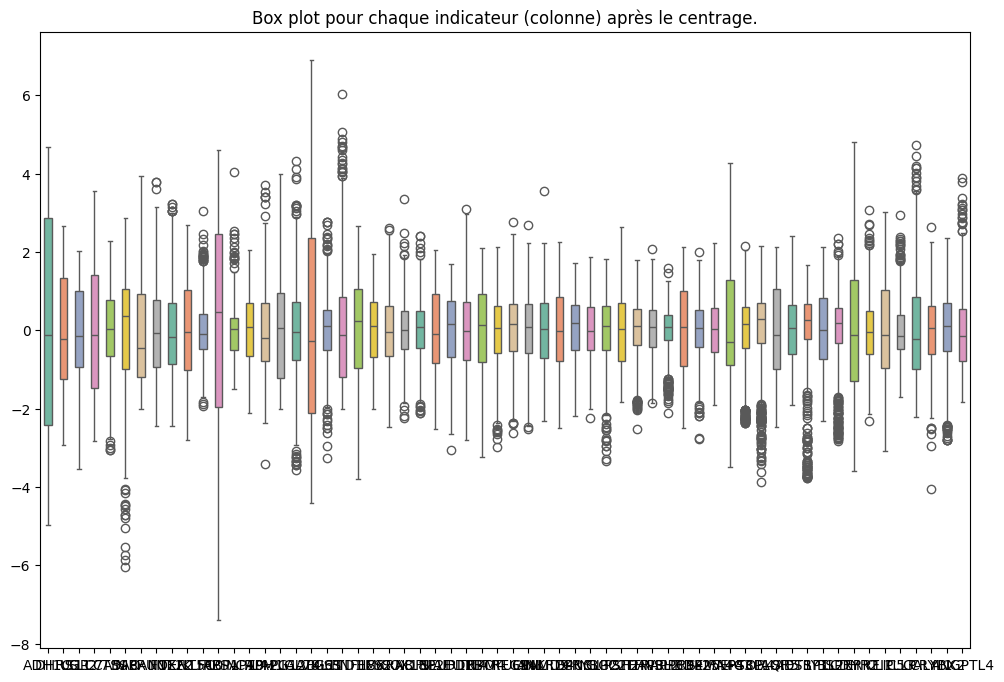

In [20]:
# Créer un box plot pour chaque colonne
plt.figure(figsize=(12, 8))
sns.boxplot(data=X_centered, width=0.5, palette="Set2")

# Ajouter un titre
plt.title("Box plot pour chaque indicateur (colonne) après le centrage.")

# Afficher le graphique
plt.show()

In [21]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_centered,y,test_size=0.20,random_state=42)

# 2) Algorithmes Utilisés (espaces d'hypothèses)

---



Nous avons testé plusieurs algorithmes de classification en explorant leurs espaces d'hypothèses :

* Régression Logistique : Modèle linéaire simple utilisé pour la classification binaire. L'espace d'hypothèses est constitué d'hyperplans linéaires séparant les classes.

* SVM (Support Vector Machine) : Algorithme efficace pour la séparation des classes dans des espaces de grande dimension. L'espace d'hypothèses inclut des frontières de décision optimisées via des marges maximales.

* k-NN (k-Nearest Neighbors) : Basé sur la proximité des points pour effectuer la classification. L'espace d'hypothèses dépend de la structure locale des données et de la valeur de k.

* Arbre de Décision : Modèle basé sur une structure arborescente pour prendre des décisions. L'espace d'hypothèses est défini par un ensemble de règles de partitionnement des données.

* Forêt Aléatoire : Ensemble d'arbres de décision pour améliorer la robustesse et réduire le surapprentissage. L'espace d'hypothèses est plus large grâce à la combinaison de plusieurs modèles indépendants

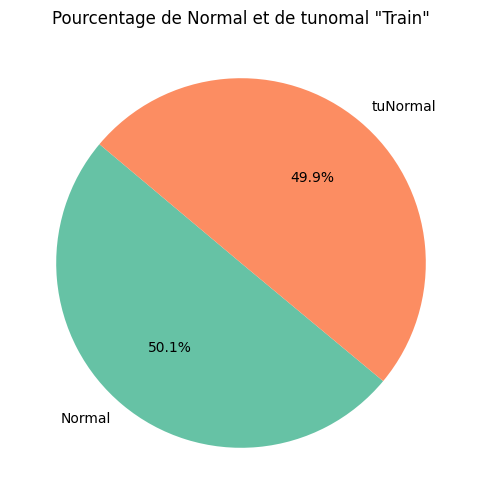

In [22]:
# Calculer les pourcentages de chaque classe 'colon_cancer'
total_samples = len(y_train)
diabetes_counts = y_train.value_counts()
percentage_diabetes = (diabetes_counts / total_samples) * 100

# Données à représenter
labels = ['Normal', 'tuNormal']
sizes = percentage_diabetes.values

# Création du cercle
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62'], startangle=140)

# Afficher les pourcentages
plt.title('Pourcentage de Normal et de tunomal "Train"')

plt.show()

* les données d'entraînement sont équilibrées avec une
répartition presque égale entre les classes "Normal" et "tuNormal" (50.1 % vs 49.9 %). Il n'est donc pas nécessaire d'appliquer des techniques de rééquilibrage comme `l'oversampling` ou `l'undersampling`.

In [23]:
from scipy.stats import pearsonr
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

* Modèle de régression logistique pour classer les échantillons sur toutes ensembles de données avant la `**sélection des features.**`




In [24]:
# Modèle de régression logistique
model = LogisticRegression(max_iter=500)

# Entraîner le modèle avec les features sélectionnées
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Évaluer la performance du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle avec toutes les variables sélectionnées : {accuracy:.4f}")

from sklearn.model_selection import cross_val_score

# Évaluer la précision sur les données d'entraînement
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print(f"Précision sur les données d'entraînement : {train_accuracy:.4f}")
print(f"Précision sur les données de test : {test_accuracy:.4f}")

# Vérification avec validation croisée (5-fold)
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"Précision moyenne avec validation croisée : {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Précision du modèle avec toutes les variables sélectionnées : 1.0000
Précision sur les données d'entraînement : 1.0000
Précision sur les données de test : 1.0000
Précision moyenne avec validation croisée : 1.0000 ± 0.0000


* Les performances sur l'entraînement et le test sont très proches, et la validation croisée donne une précision similaire. Cela indique qu'il n'y a pas de surapprentissage (overfitting), car le modèle généralise bien sur des données non vues.



In [25]:
# Modèle KNN avec k=5 (nombre de voisins)
knn_model = KNeighborsClassifier(n_neighbors=200)

# Entraîner le modèle avec les features sélectionnées
knn_model.fit(X_train, y_train)

# Prédictions
y_pred = knn_model.predict(X_test)

# Évaluer la performance du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle avec toutes les variables sélectionnées : {accuracy:.4f}")

from sklearn.model_selection import cross_val_score

# Évaluer la précision sur les données d'entraînement
train_accuracy = knn_model.score(X_train, y_train)
test_accuracy = knn_model.score(X_test, y_test)

print(f"Précision sur les données d'entraînement : {train_accuracy:.4f}")
print(f"Précision sur les données de test : {test_accuracy:.4f}")

# Vérification avec validation croisée (5-fold)
cv_scores = cross_val_score(knn_model, X_train, y_train, cv=5)
print(f"Précision moyenne avec validation croisée : {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Précision du modèle avec toutes les variables sélectionnées : 0.9627
Précision sur les données d'entraînement : 0.9736
Précision sur les données de test : 0.9627
Précision moyenne avec validation croisée : 0.9736 ± 0.0106


# Ajout de bruit:
* L'ajout de bruit permet d'évaluer la robustesse du modèle. Si la précision chute fortement après l'ajout de bruit, cela signifie que le modèle dépend trop des caractéristiques originales et peut manquer de généralisation.

In [26]:
# Ajouter du bruit aux features
X_noisy = X_centered + np.random.normal(0, 2, X_centered.shape)

# Re-diviser en train/test
X_trainB, X_testB, y_trainB, y_testB = train_test_split(X_noisy, y, test_size=0.2, random_state=42)

# Ré-entraîner et tester
model.fit(X_trainB, y_trainB)
y_predB = model.predict(X_testB)
accuracyB = accuracy_score(y_testB, y_predB)
print(f"Précision du modèle avec bruit : {accuracyB:.4f}")

# Évaluer la précision sur les données d'entraînement
train_accuracyBruit = model.score(X_trainB, y_trainB)
test_accuracyBruit = model.score(X_testB, y_testB)

print(f"Précision sur les données d'entraînement : {train_accuracyBruit:.4f}")
print(f"Précision sur les données de test : {test_accuracyBruit:.4f}")

# Vérification avec validation croisée (5-fold)
cv_scoresB = cross_val_score(model, X_trainB, y_trainB, cv=5)
print(f"Précision moyenne avec validation croisée : {cv_scoresB.mean():.4f} ± {cv_scoresB.std():.4f}")

Précision du modèle avec bruit : 0.9317
Précision sur les données d'entraînement : 0.9922
Précision sur les données de test : 0.9317
Précision moyenne avec validation croisée : 0.9222 ± 0.0131


* Même avec du bruit, le modèle maintient une bonne précision (0.
9379), montrant qu'il ne souffre pas d’overfitting. Il reste performant mais légèrement sensible aux perturbations.

# La sélection des caractéristiques


Pour la sélection des caractéristiques dans un modèle de machine learning, l'objectif est d'identifier les variables (ou caractéristiques) les plus importantes pour la prédiction. La sélection des caractéristiques permet de réduire la complexité du modèle, d'améliorer la performance et de diminuer le risque de surapprentissage.


*1. Methode de Variance Threshold*

---








* Calculate feature variances



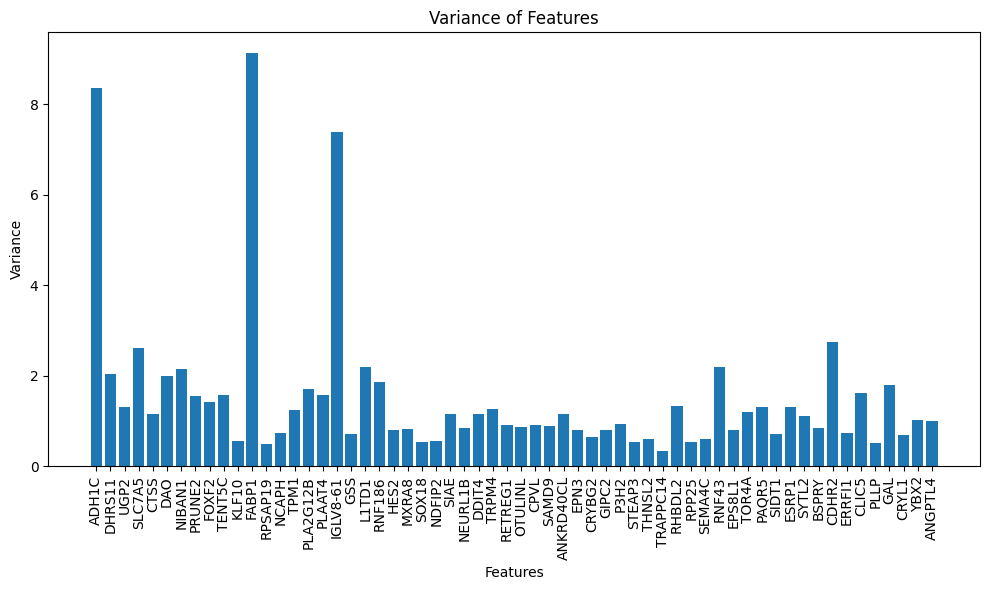

In [27]:
# Calculate feature variances
feature_variances = X.var(axis=0)

# Create a bar graph
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(feature_variances.index, feature_variances.values)
plt.xlabel("Features")
plt.ylabel("Variance")
plt.title("Variance of Features")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

* la variance des différentes caractéristiques (gènes) dans le dataset. Une variance élevée signifie que l'expression du gène varie beaucoup entre les échantillons, ce qui peut indiquer un potentiel discriminant entre les tissus sains et cancéreux.
* En revanche, les gènes avec une faible variance ont peu de variation et pourraient être moins utiles pour la classification. On peut envisager de sélectionner uniquement les gènes avec une variance élevée pour améliorer la

Threshold: 0.10 | Features: 60 | Accuracy: 1.0000
Threshold: 0.60 | Features: 52 | Accuracy: 1.0000
Threshold: 1.10 | Features: 30 | Accuracy: 0.9984
Threshold: 1.60 | Features: 14 | Accuracy: 0.9969
Threshold: 2.10 | Features: 8 | Accuracy: 0.9938
Threshold: 2.60 | Features: 5 | Accuracy: 0.9673
Threshold: 3.10 | Features: 3 | Accuracy: 0.8678
Threshold: 3.60 | Features: 3 | Accuracy: 0.8678
Threshold: 4.10 | Features: 3 | Accuracy: 0.8678
Threshold: 4.60 | Features: 3 | Accuracy: 0.8678
Threshold: 5.10 | Features: 3 | Accuracy: 0.8678
Threshold: 5.60 | Features: 3 | Accuracy: 0.8678
Threshold: 6.10 | Features: 3 | Accuracy: 0.8678
Threshold: 6.60 | Features: 3 | Accuracy: 0.8678
Threshold: 7.10 | Features: 3 | Accuracy: 0.8678
Threshold: 7.60 | Features: 2 | Accuracy: 0.8662
Threshold: 8.10 | Features: 2 | Accuracy: 0.8662
Threshold: 8.60 | Features: 1 | Accuracy: 0.7621
Threshold: 9.10 | Features: 1 | Accuracy: 0.7621


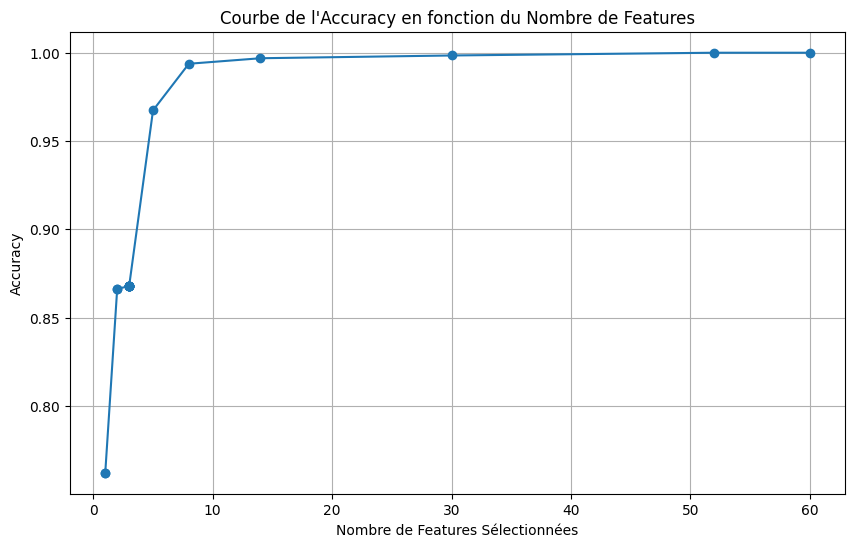

In [28]:
# Définir une plage de seuils de variance
thresholds = np.arange(0.1, 9.5, 0.5)
best_threshold = 0
best_accuracy = 0
best_selected_features = None
accuracies = []
n_features = []

for threshold in thresholds:
    selector = VarianceThreshold(threshold=threshold)
    X_selected = selector.fit_transform(X)
    selected_features = X.columns[selector.get_support()]

    if X_selected.shape[1] > 0:  # Vérifier si des variables ont été sélectionnées
        X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
        model = LogisticRegression(max_iter=500)

        # Évaluer la précision avec validation croisée
        cv_scores = cross_val_score(model, X_train, y_train, cv=5)
        mean_accuracy = cv_scores.mean()

        print(f"Threshold: {threshold:.2f} | Features: {len(selected_features)} | Accuracy: {mean_accuracy:.4f}")

        accuracies.append(mean_accuracy)
        n_features.append(len(selected_features))

# Tracer la courbe d'accuracy en fonction du nombre de features sélectionnées
plt.figure(figsize=(10, 6))
plt.plot(n_features, accuracies, marker='o', linestyle='-')
plt.xlabel('Nombre de Features Sélectionnées')
plt.ylabel('Accuracy')
plt.title("Courbe de l'Accuracy en fonction du Nombre de Features")
plt.grid()
plt.show()

* L'accuracy augmente rapidement avec le nombre de features, atteignant
presque 100 % autour de 10-15 gènes, puis se stabilise, indiquant qu'un petit sous-ensemble de gènes est suffisant pour une bonne classification.

* Application de Variance Threshold








In [43]:
# Apply VarianceThreshold with threshold=2.10
selector = VarianceThreshold(threshold=2.10)
X_selected = selector.fit_transform(X)
X_selected = pd.DataFrame(X_selected, columns=X.columns[selector.get_support()])
X_selected

,ADH1C,SLC7A5,NIBAN1,FABP1,IGLV8-61,L1TD1,RNF43,CDHR2
0,9.199944,3.864253,1.174665,11.467835,11.904110,4.364139,4.241267,3.500730
1,7.767618,3.069581,5.959414,11.446051,6.396734,2.479617,4.002000,4.658790
2,7.918904,3.188257,1.560386,12.648347,8.232526,3.419027,3.447174,5.649376
3,9.053553,2.357523,3.548988,4.592964,7.476612,2.825716,3.655234,5.437107
4,6.027822,4.137667,3.307945,12.407888,3.589052,2.281847,3.863294,6.286182
...,...,...,...,...,...,...,...,...
799,6.019963,5.947781,3.511464,3.786395,2.095629,1.146420,3.521571,4.632634
800,3.691606,4.746829,3.516129,3.260248,0.697564,0.866341,2.456133,1.800088
801,3.035242,5.916828,1.192243,1.430316,0.610504,0.610504,2.159680,3.624820
802,3.021057,5.694947,1.404105,9.148772,4.008518,2.565847,6.272607,4.088197


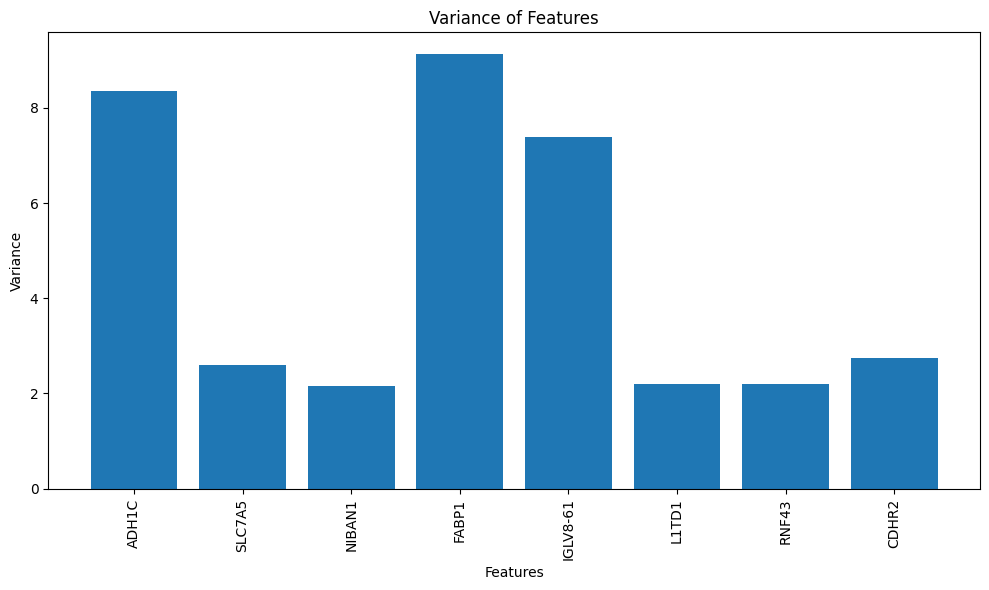

In [46]:
# Calculate feature variances
feature_variances = X_selected.var(axis=0)

# Create a bar graph
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(feature_variances.index, feature_variances.values)
plt.xlabel("Features")
plt.ylabel("Variance")
plt.title("Variance of Features")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

* penalty='l2' : Ce paramètre spécifie le type de régularisation à utiliser. La régularisation aide à prévenir le surajustement en ajoutant une pénalité à la complexité du modèle. 'l2' fait référence à la régularisation L2, qui ajoute une pénalité proportionnelle au carré de l'amplitude des coefficients. Il s'agit du paramètre par défaut pour LogisticRegression.


* C=1.0 : Ce paramètre contrôle la force de la régularisation. C'est l'inverse de la force de régularisation ; une valeur plus petite signifie une régularisation plus forte. Dans ce cas, il est défini sur 1.0, indiquant une force de régularisation modérée.

In [31]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(max_iter=500, penalty='l2', C=1.0)  # Add regularization
model.fit(X_train, y_train)

# Evaluate training accuracy
train_accuracy = model.score(X_train, y_train)
print(f"Training accuracy: {train_accuracy:.4f}")

# Evaluate testing accuracy
test_accuracy = model.score(X_test, y_test)
print(f"Testing accuracy: {test_accuracy:.4f}")

Training accuracy: 0.9953
Testing accuracy: 0.9938


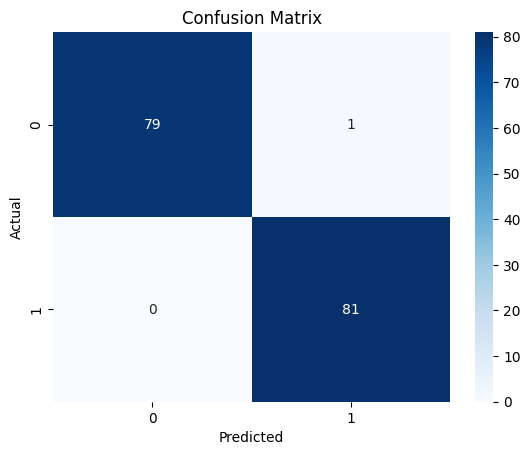

In [32]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)


# Visualize the confusion matrix using seaborn heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

3. Validation croisée avec sélection des caractéristiques :


In [33]:
# Perform cross-validation
cv_scores = cross_val_score(model, X_selected, y, cv=5)
print(f"Cross-validation accuracy: {cv_scores.mean():.4f} +/- {cv_scores.std():.4f}")

Cross-validation accuracy: 0.9913 +/- 0.0085


*2. Methode de CHI-2*

---




In [34]:
from sklearn.feature_selection import SelectKBest, chi2

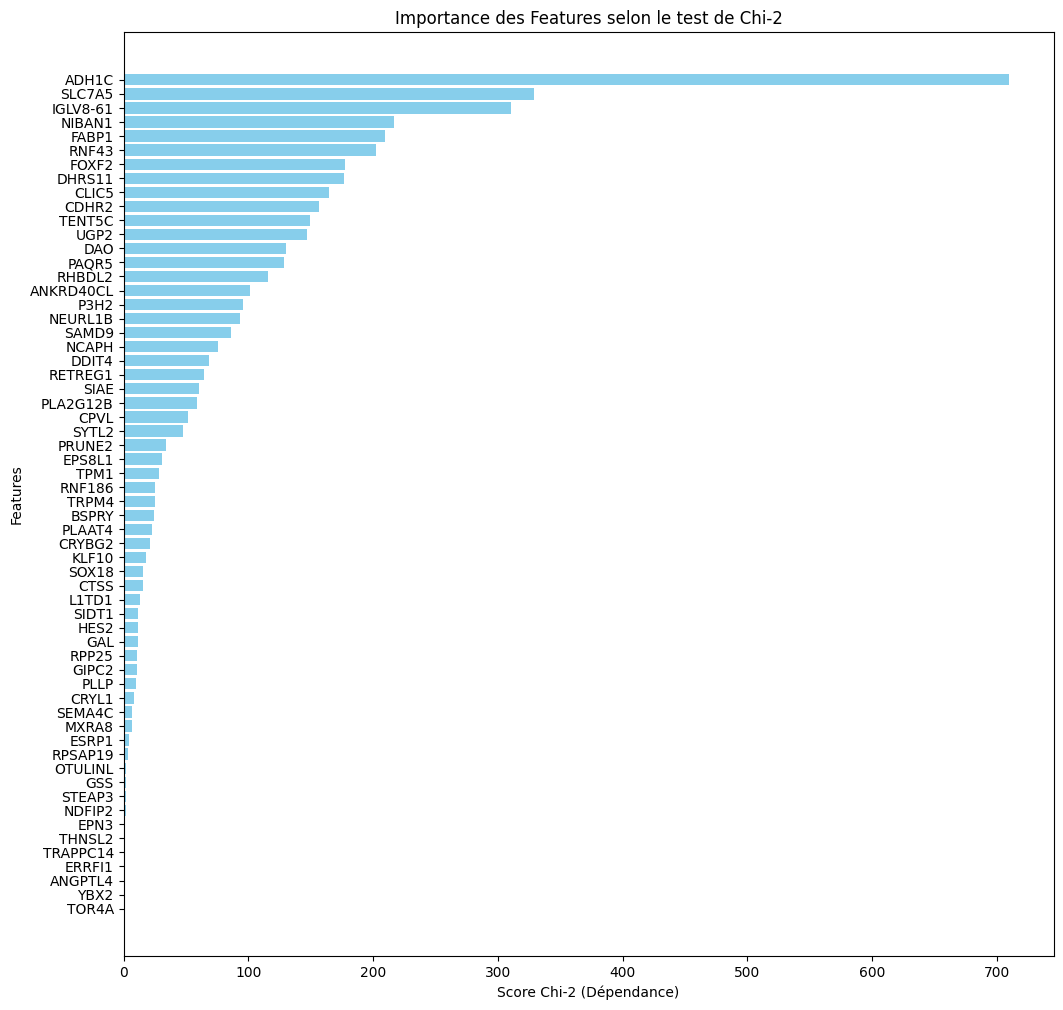

In [35]:
# Appliquer le test de Chi-2
selector = SelectKBest(score_func=chi2, k='all')  # Sélectionner toutes les features pour comparaison
X_selected = selector.fit_transform(X, y)

# Récupérer les scores Chi-2
chi2_scores = selector.scores_

# Trier les features selon leur importance
sorted_indices = np.argsort(chi2_scores)[::-1]  # Tri décroissant
sorted_features = X.columns[sorted_indices]
sorted_scores = chi2_scores[sorted_indices]

# Affichage du graphe
plt.figure(figsize=(12, 12))
plt.barh(sorted_features, sorted_scores, color='skyblue')
plt.xlabel("Score Chi-2 (Dépendance)")
plt.ylabel("Features")
plt.title("Importance des Features selon le test de Chi-2")
plt.gca().invert_yaxis()  # Inverser l'axe Y pour que la plus importante soit en haut
plt.show()


In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

# Définir les valeurs de k (nombre de features à garder)
k_values = range(1, X.shape[1] + 1)

best_k = 0
best_accuracy = 0
accuracies = []
n_features = []

for k in k_values:
    selector = SelectKBest(chi2, k=k)
    X_selected = selector.fit_transform(X, y)

    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
    model = LogisticRegression(max_iter=500)

    # Évaluer la précision avec validation croisée
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    mean_accuracy = cv_scores.mean()

    print(f"K: {k} | Accuracy: {mean_accuracy:.4f}")

    accuracies.append(mean_accuracy)
    n_features.append(k)

    # Mettre à jour le meilleur k
    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_k = k

K: 1 | Accuracy: 0.8616
K: 2 | Accuracy: 0.9720
K: 3 | Accuracy: 0.9674
K: 4 | Accuracy: 0.9829
K: 5 | Accuracy: 0.9813
K: 6 | Accuracy: 0.9922
K: 7 | Accuracy: 0.9906
K: 8 | Accuracy: 0.9938
K: 9 | Accuracy: 0.9969
K: 10 | Accuracy: 0.9969
K: 11 | Accuracy: 0.9953
K: 12 | Accuracy: 0.9969
K: 13 | Accuracy: 0.9969
K: 14 | Accuracy: 0.9984
K: 15 | Accuracy: 0.9984
K: 16 | Accuracy: 0.9984
K: 17 | Accuracy: 0.9984
K: 18 | Accuracy: 0.9969
K: 19 | Accuracy: 0.9969
K: 20 | Accuracy: 0.9969
K: 21 | Accuracy: 0.9984
K: 22 | Accuracy: 0.9984
K: 23 | Accuracy: 0.9984
K: 24 | Accuracy: 1.0000
K: 25 | Accuracy: 1.0000
K: 26 | Accuracy: 0.9984
K: 27 | Accuracy: 1.0000
K: 28 | Accuracy: 1.0000
K: 29 | Accuracy: 1.0000
K: 30 | Accuracy: 1.0000
K: 31 | Accuracy: 1.0000
K: 32 | Accuracy: 1.0000
K: 33 | Accuracy: 1.0000
K: 34 | Accuracy: 1.0000
K: 35 | Accuracy: 1.0000
K: 36 | Accuracy: 1.0000
K: 37 | Accuracy: 1.0000
K: 38 | Accuracy: 1.0000
K: 39 | Accuracy: 1.0000
K: 40 | Accuracy: 1.0000
K: 41 | A

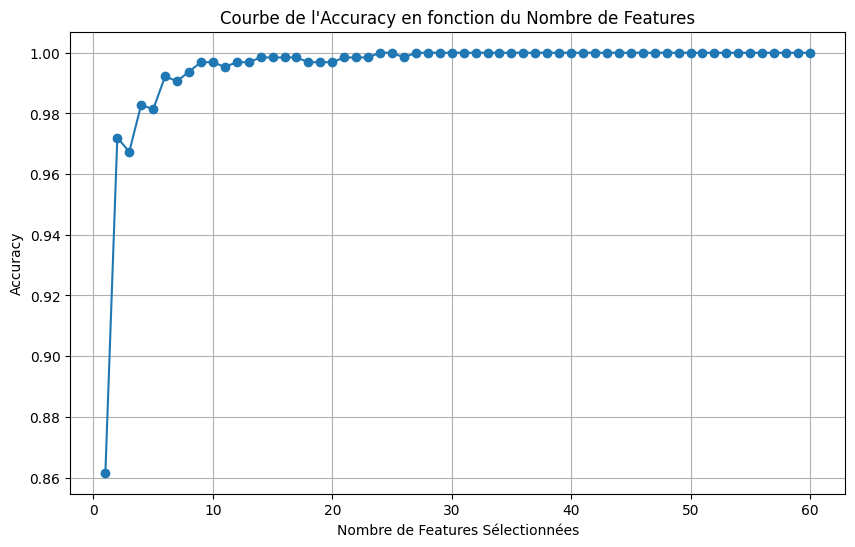

Meilleur k: 24 avec une accuracy de 1.0000


In [37]:
# Tracer la courbe de l'accuracy en fonction du nombre de features sélectionnées
plt.figure(figsize=(10, 6))
plt.plot(n_features, accuracies, marker='o', linestyle='-')
plt.xlabel("Nombre de Features Sélectionnées")
plt.ylabel("Accuracy")
plt.title("Courbe de l'Accuracy en fonction du Nombre de Features")
plt.grid()
plt.show()

print(f"Meilleur k: {best_k} avec une accuracy de {best_accuracy:.4f}")

In [47]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2

# Appliquer le test de Chi-2 pour sélectionner les 4 meilleures features
k = 6  # Nombre de features à sélectionner
selector = SelectKBest(score_func=chi2, k=k)
X_selected = selector.fit_transform(X, y)

# Récupérer les noms des 4 features sélectionnées
selected_features = X.columns[selector.get_support()]

# Créer un DataFrame avec uniquement ces 4 features
X_selected_df = pd.DataFrame(X_selected, columns=selected_features)

# Afficher le DataFrame des 4 features sélectionnées
X_selected_df


,ADH1C,SLC7A5,NIBAN1,FABP1,IGLV8-61,RNF43
0,9.199944,3.864253,1.174665,11.467835,11.904110,4.241267
1,7.767618,3.069581,5.959414,11.446051,6.396734,4.002000
2,7.918904,3.188257,1.560386,12.648347,8.232526,3.447174
3,9.053553,2.357523,3.548988,4.592964,7.476612,3.655234
4,6.027822,4.137667,3.307945,12.407888,3.589052,3.863294
...,...,...,...,...,...,...
799,6.019963,5.947781,3.511464,3.786395,2.095629,3.521571
800,3.691606,4.746829,3.516129,3.260248,0.697564,2.456133
801,3.035242,5.916828,1.192243,1.430316,0.610504,2.159680
802,3.021057,5.694947,1.404105,9.148772,4.008518,6.272607


In [48]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected_df, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model_chi2 = LogisticRegression(max_iter=500, penalty='l2', C=1.0)  # Add regularization
model_chi2.fit(X_train, y_train)

# Evaluate training accuracy
train_accuracy = model_chi2.score(X_train, y_train)
print(f"Training accuracy: {train_accuracy:.4f}")

# Evaluate testing accuracy
test_accuracy = model_chi2.score(X_test, y_test)
print(f"Testing accuracy: {test_accuracy:.4f}")

Training accuracy: 0.9953
Testing accuracy: 0.9938


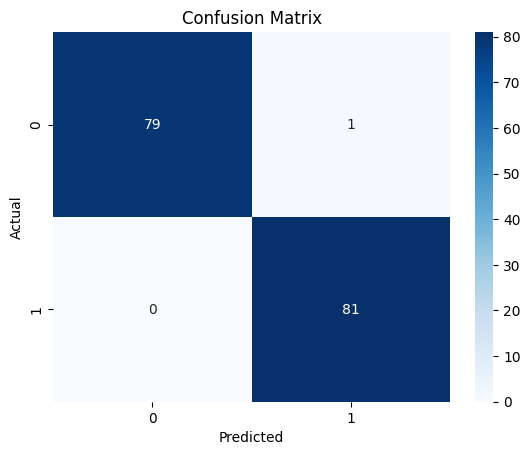

In [49]:
y_pred = model_chi2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)


# Visualize the confusion matrix using seaborn heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()